In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [3]:

df=pd.read_csv("/home/sathish/Downloads/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.shape

(731, 16)

In [5]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
x = df[['season','windspeed','casual','registered']]

<Axes: >

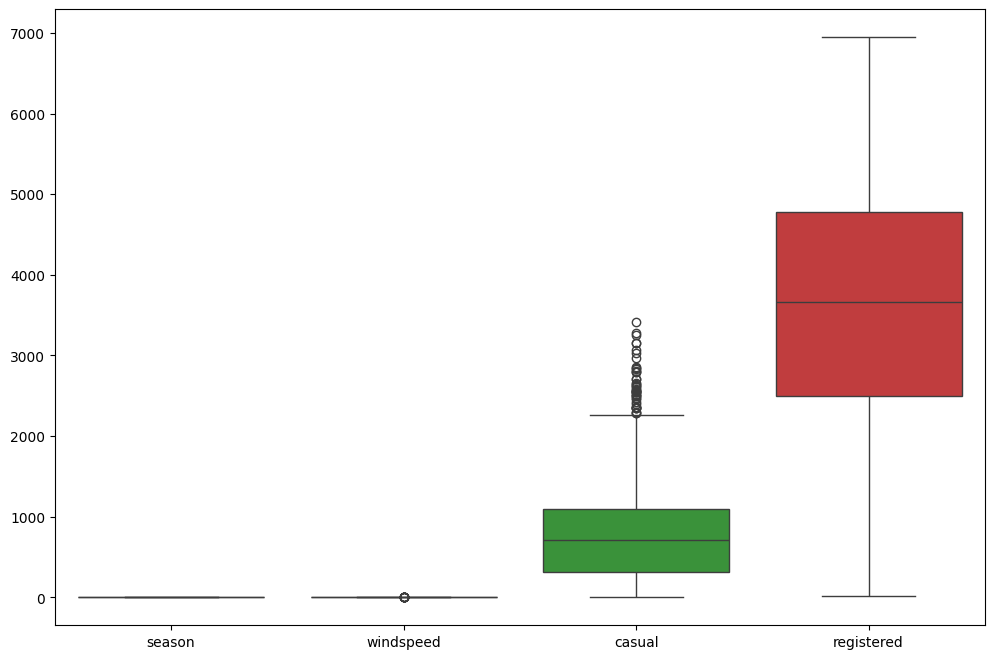

In [7]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.boxplot(x)

            

In [8]:
feature=df[['season','windspeed','casual','registered']]

In [9]:
def remove_outliers_iqr(df, feature):
    Q1=df[feature].quantile(0.25)
    Q3=df[feature].quantile(0.75)
    IQR=Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df [(df [feature] >= lower_bound) & (df[feature] <= upper_bound)]

In [10]:
df= remove_outliers_iqr(df,'casual')

In [11]:
x = df[['season','windspeed','casual','registered']]

<Axes: >

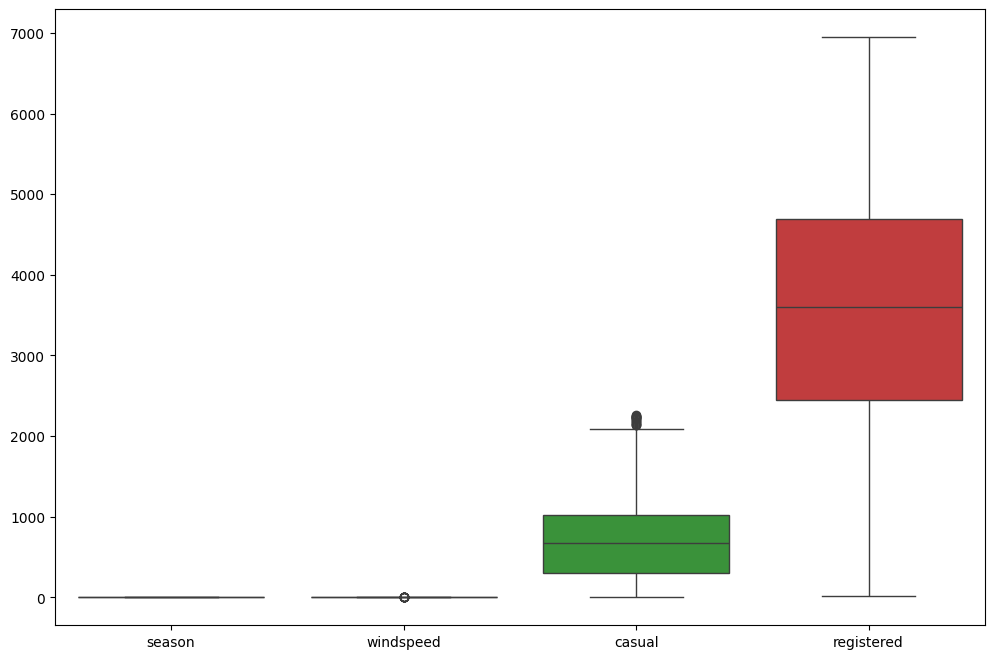

In [12]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.boxplot(x)

            

In [13]:
# split dataset
x = df[['season','windspeed','casual','registered']]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)


In [14]:
x

,season,windspeed,casual,registered
0,1,0.160446,331,654
1,1,0.248539,131,670
2,1,0.248309,120,1229
3,1,0.160296,108,1454
4,1,0.186900,82,1518
...,...,...,...,...
726,1,0.350133,247,1867
727,1,0.155471,644,2451
728,1,0.124383,159,1182
729,1,0.350754,364,1432


In [15]:
k=2
knn=KNeighborsRegressor(n_neighbors=k)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [16]:
y_pred=knn.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean_sqared error(mse) : {mse:.2f}")
print(f"R_sqared(R2) score: {r2: .2f}")

Mean_sqared error(mse) : 5033.32
R_sqared(R2) score:  1.00
